In [23]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [24]:
type(fish)

pandas.core.frame.DataFrame

In [25]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [26]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']]

In [27]:
fish_input

,Weight,Length,Diagonal,Height,Width
0,242.0,25.4,30.0,11.5200,4.0200
1,290.0,26.3,31.2,12.4800,4.3056
2,340.0,26.5,31.1,12.3778,4.6961
3,363.0,29.0,33.5,12.7300,4.4555
4,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...
154,12.2,12.2,13.4,2.0904,1.3936
155,13.4,12.4,13.5,2.4300,1.2690
156,12.2,13.0,13.8,2.2770,1.2558
157,19.7,14.3,15.2,2.8728,2.0672


In [28]:
fish_target = fish['Species']
fish_target

0      Bream
1      Bream
2      Bream
3      Bream
4      Bream
       ...  
154    Smelt
155    Smelt
156    Smelt
157    Smelt
158    Smelt
Name: Species, Length: 159, dtype: object

In [29]:
print(fish_input.shape)
print(fish_target.shape)

(159, 5)
(159,)


In [30]:
from sklearn.model_selection import train_test_split

x_data=fish.loc[:, ['Weight', 'Length', 'Diagonal', 'Height', 'Width']]
y_data=fish.loc[:, 'Species']
X_train, X_test, y_train, y_test=train_test_split(x_data,
                                                  y_data,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(127, 5) (127,)
(32, 5) (32,)


In [31]:
print(X_train.head())

     Weight  Length  Diagonal   Height   Width
24    700.0    35.0      40.5  16.2405  5.5890
71    300.0    26.0      29.0  11.3680  4.2340
148     9.7    11.0      12.0   2.1960  1.3800
132   430.0    38.0      40.5   7.2900  4.5765
153     9.8    12.0      13.2   2.2044  1.1484


In [32]:
y_train.head()

24      Bream
71     Parkki
148     Smelt
132      Pike
153     Smelt
Name: Species, dtype: object

In [33]:
X_test.head()

,Weight,Length,Diagonal,Height,Width
88,130.0,22.0,23.5,6.1100,3.5250
124,1000.0,43.0,45.2,11.9328,7.2772
45,160.0,22.5,25.3,7.0334,3.8203
90,110.0,22.0,23.5,5.5225,3.9950
31,955.0,38.5,44.0,18.0840,6.2920


In [34]:
y_test.head()

88     Perch
124    Perch
45     Roach
90     Perch
31     Bream
Name: Species, dtype: object

In [35]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
#Standard Scaling
std = StandardScaler()
std.fit(X_train)
X_train_std= std.transform(X_train)
X_test_std= std.transform(X_test)

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [39]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.5625
[[ 6  0  2  0  0  0]
 [ 0  0  3  0  0  0]
 [ 2  0 10  0  0  0]
 [ 1  0  0  2  0  0]
 [ 0  0  4  0  0  0]
 [ 0  0  2  0  0  0]]


In [40]:
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.71875
[[8 0 0 0 0 0]
 [0 2 1 0 0 0]
 [0 0 7 0 5 0]
 [0 0 0 3 0 0]
 [0 0 2 0 1 1]
 [0 0 0 0 0 2]]


In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.84375
[[ 8  0  0  0  0  0]
 [ 0  2  0  0  1  0]
 [ 0  0 10  0  2  0]
 [ 0  0  0  3  0  0]
 [ 0  0  2  0  2  0]
 [ 0  0  0  0  0  2]]


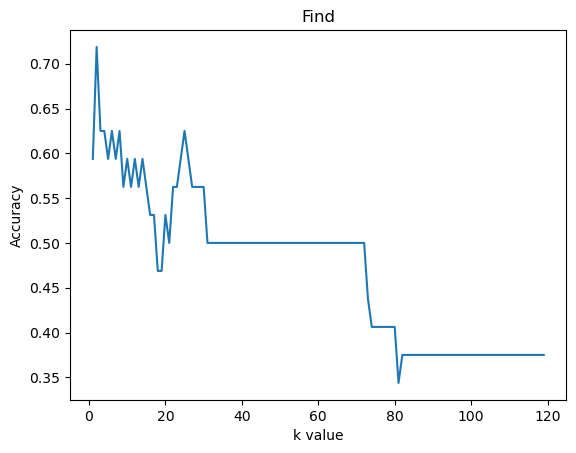

In [42]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
k_range = range(1, 120)
find_accuracy = []

for k in k_range:
  find_model = KNeighborsClassifier(n_neighbors = k)
  find_model.fit(X_train, y_train.values.ravel())

  find_accuracy.append(find_model.score(X_test, y_test))
  
plt.plot(k_range, find_accuracy, label="training accuracy")
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.title("Find")
plt.show()